In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Aim is to predict the marks of students of the test data

In [2]:
# Use the file namd 'training data' to train the model

data = pd.read_csv('Training data.csv')
x_train = np.array(data.iloc[:,0:8])
y_train = np.array(data.iloc[:,8]).reshape(-1,1)

# Try plotting y_train with different features
# To get an idea whether to add some features or not
# Add some features if required in x_train
# Also do label encoding for features not represented in numbers
# refer the link if not know : https://youtu.be/589nCGeWG1w?si=t2Wa7LgbUOO4RooM

feature_names = data.columns[:-1]
def feature_changing(x_train):
  # ---------
   # x_train to df
    x_train_df = pd.DataFrame(x_train, columns=feature_names)

    # Label encoding for char's
    categorical_features = ['internet', 'sex']
    le = LabelEncoder()
    for feature in categorical_features:
        x_train_df[feature] = le.fit_transform(x_train_df[feature])
    
    # Adding linear features
    x_train_df['age_iq_interaction'] = x_train_df['age'] * x_train_df['iq']
    x_train_df['study_time_iq_interaction'] = x_train_df['studytime'] * x_train_df['iq']
    x_train_df['study_time_internet_interaction'] = x_train_df['studytime'] * x_train_df['internet']
    
    # Df to np array
    x_train = np.array(x_train_df)
    return x_train
  # ---------
x_train = feature_changing(x_train)

In [3]:
def z_score(x_train):

  # ---------
    # write the code for feature scaling here
    # Your code here
    x_mean = np.mean(x_train, axis=0)
    x_std = np.std(x_train, axis=0)  
    x_train = (x_train - x_mean) / x_std
  # ---------

    return x_train,x_std,x_mean

In [4]:
def cost(x_train,y_train,w,b):

  # ---------
    # Your code here
    # Use mean square error as cost function
    # return cost
    pred = x_train @ w + b
    loss = np.mean((pred - y_train) ** 2)
  # ---------

    return loss

In [5]:
def gradient_descent(x_train, y_train, w, b):
    # Choose learning rate and perform gradient descent
    m = x_train.shape[0] 
    learning_rate = 0.01  
    for _ in range(1000): 
        pred = x_train @ w + b
        # Gradients
        dw = (1/m) * (x_train.T @ (pred - y_train))
        db = (1/m) * np.sum(pred - y_train, axis = 0)
        # Update weights and bias
        w -= learning_rate * dw
        b -= learning_rate * db
    return w, b

In [6]:
x_train = x_train.astype(np.float64)
x_train,x_std,x_mean = z_score(x_train)

np.random.seed(2147483647)
w = np.random.randn(x_train.shape[1],1)
b = np.random.randn(1)

old_cost = 0

while abs(old_cost - cost(x_train,y_train,w,b))>0.00001:
  old_cost = cost(x_train,y_train,w,b)
  w,b = gradient_descent(x_train,y_train,w,b)

x_predict = pd.read_csv('Test data.csv').iloc[:,:8].to_numpy()
x_predict = feature_changing(x_predict)
x_predict = (x_predict - x_mean)/x_std
ans = pd.read_csv('Test data.csv').iloc[:,8].to_numpy()

y_predict = np.dot(x_predict,w) + b

accuracy = 0
for dim in range(len(ans)):
  if abs(y_predict[dim]-ans[dim])<0.5: # do not change the tolerance as you'll be checked on +- 0.5 error only
    accuracy += 1
accuracy = round(accuracy*100/200.0,2)
ok = 'Congratulations' if accuracy>95 else 'Optimization required'
print(f"{ok}, your accuracy is {accuracy}%")

Congratulations, your accuracy is 100.0%


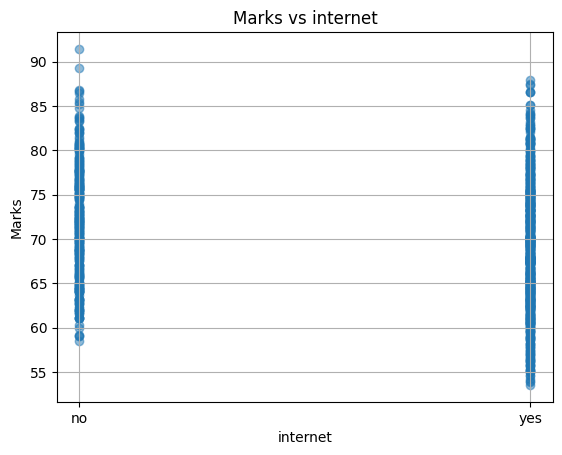

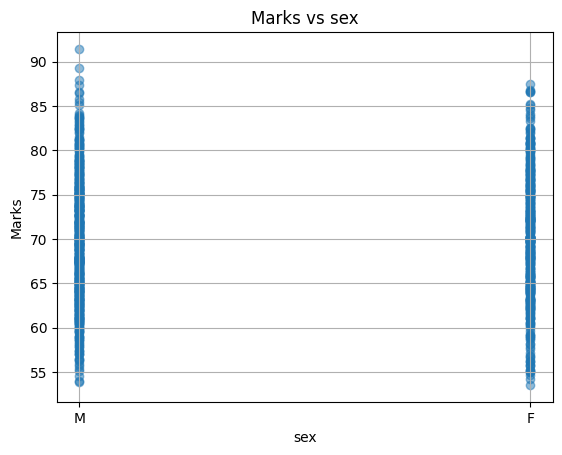

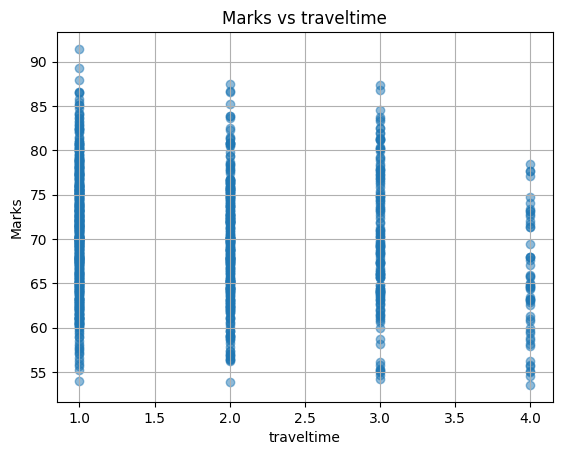

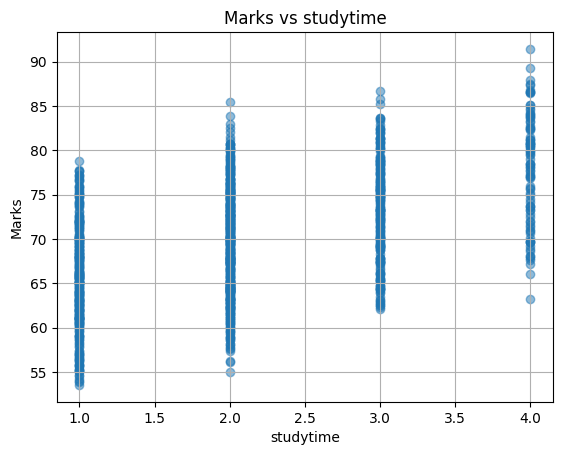

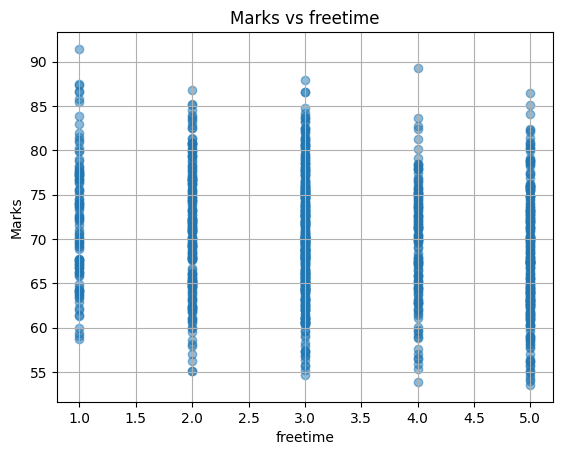

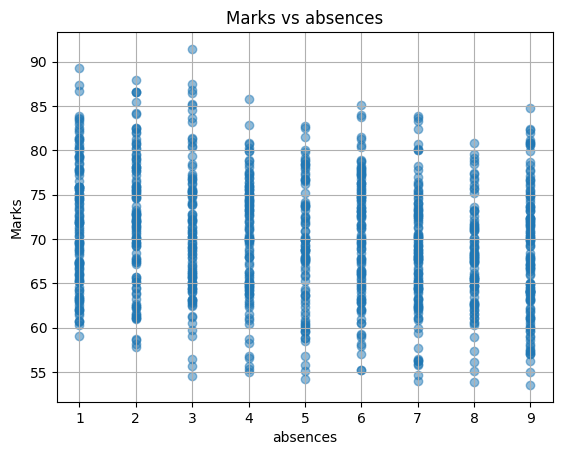

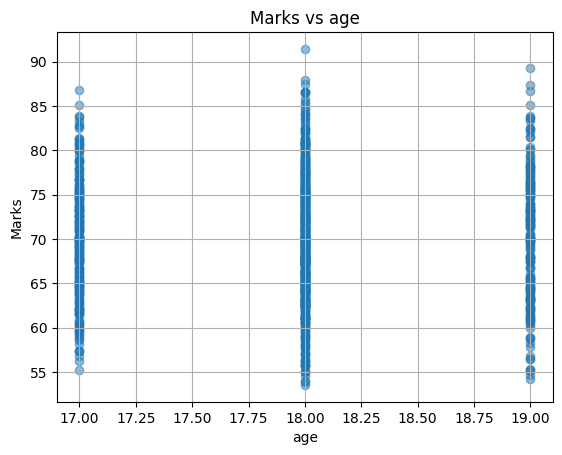

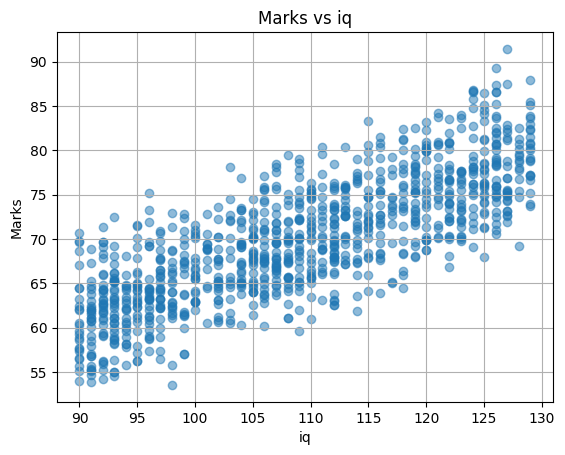

In [7]:
x_train_df = data.iloc[:, 0:8] 
y_train = np.array(data.iloc[:, 8]).reshape(-1, 1)
for feature_name in x_train_df.columns:
    plt.scatter(x_train_df[feature_name], y_train, alpha=0.5) 
    plt.xlabel(feature_name)
    plt.ylabel('Marks')
    plt.title(f'Marks vs {feature_name}')
    plt.grid(True)
    plt.show()
x_train = np.array(x_train_df)